In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [61]:
df = pd.read_csv('insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1 Do smokers have higher insurance charges than non-smokers?
Null hypothesis: Smokers do not have higher insurance charges than non smokers.

Alternate hypothesis: There is a difference in insurance charges between smokers and non smokers.

Numerical data with two samples so a T-Test. Independent. We assume:
 - No significant outliers.
 - Normality.
 - Equal variance.

In [62]:
# Checking number of people in each group.
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [63]:
# Splitting the data.
smoker = df.loc[df['smoker'] == 'yes'].copy()
non_smoker = df.loc[df['smoker'] == 'no'].copy()

In [64]:
# Defining the target.
smoker_charges = smoker['charges']
non_smoker_charges = non_smoker['charges']

In [65]:
# Removing outliers.
zscores= stats.zscore(smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [66]:
zscores= stats.zscore(non_smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [67]:
# Removing outliers.
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

In [68]:
# Checking normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [69]:
result_non_smoker_charges = stats.normaltest(non_smoker_charges)
result_non_smoker_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

Our data is not normally distributed. However our sample size is large enough where we can ignore this. 

In [70]:
# Checking for equal variance
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

We also do not have equal variance. We will need to handle this when we do our t-test.

In [71]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

Our p value is < 0.05 which means we can reject our null hypothesis and say that there is a significant different between the charges of smokers and non smokers.

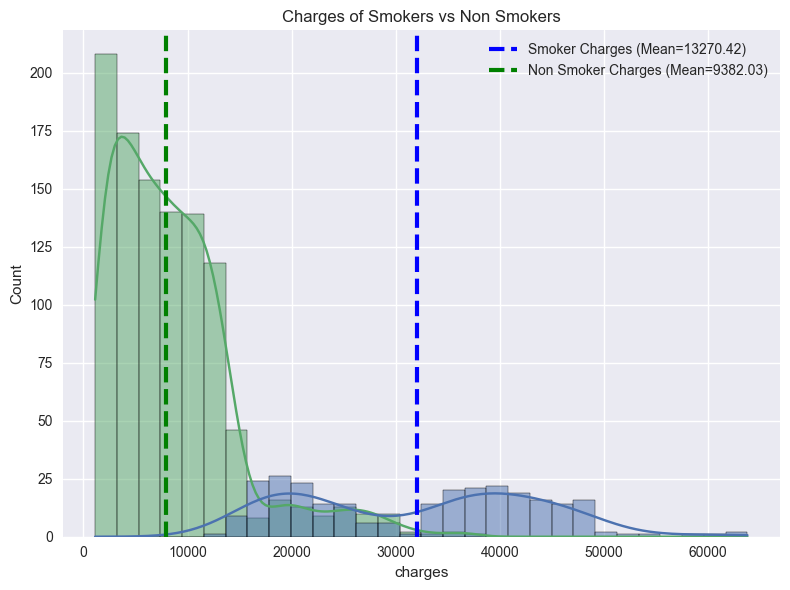

In [72]:
# Visualization
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x=df['charges'], hue = df['smoker'], kde=True,ax=ax)
ax.set_title('Charges of Smokers vs Non Smokers')

smoker_mean = np.mean(smoker_charges)
non_smoker_mean = np.mean(non_smoker_charges)

ax.axvline(smoker_mean, ls='--',lw=3, label=f"Smoker Charges (Mean={mean:.2f})",color='Blue')
ax.axvline(non_smoker_mean, ls='--', lw=3, label=f"Non Smoker Charges (Mean={median:.2f})",color = 'Green')

plt.legend()
plt.tight_layout()

## Q2 Are men more likely to smoke than women?
Null hypothesis: There is no significant difference in likeliness to smoke between men and women.

Alternate hypothesis: There is a significant difference in likeliness to smoke between men and women.

Categorical data with two samples so a Chi-Square. We assume:
 - Two categorical variables.
 - Outcomes are independant.

In [73]:
# calculate the contingency table.
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [74]:
# Run the chi-square
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [75]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Our p value is less than 0.05 so we reject the null hypothesis and say that there is a significant difference in likelihood of whether or not someone is a smoker based on gender.

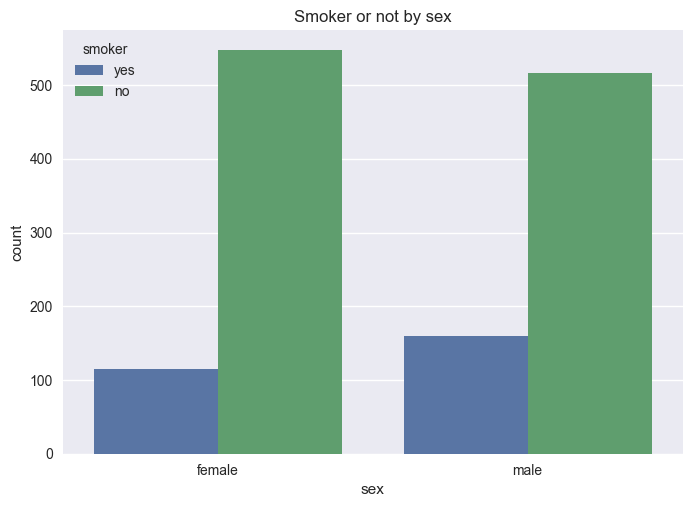

In [76]:
# Visualization
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Smoker or not by sex");

## Q3 Do different regions have different charges, on average?
Null hypothesis: There is no significant difference in charges based on region.

Alternate hypothesis: There is a significant difference in charges based on region.

Numerical data with more than two samples so we use ANOVA. We assume:
 - No significant outliers.
 - Equal variance.
 - Normality

In [77]:
# Seperating the data by region.
groups = {}
for i in df['region'].unique():
    data = df.loc[df['region'] == i, 'charges'].copy()
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [78]:
# Checking for and removing outliers.
zscores= stats.zscore(groups['southwest'])
outliers = abs(zscores)>3
np.sum(outliers)

8

In [79]:
groups['southwest'] = groups['southwest'][(np.abs(stats.zscore(groups['southwest'])) < 3)]

In [80]:
zscores= stats.zscore(groups['southeast'])
outliers = abs(zscores)>3
np.sum(outliers)

2

In [81]:
groups['southeast'] = groups['southeast'][(np.abs(stats.zscore(groups['southeast'])) < 3)]

In [82]:
zscores= stats.zscore(groups['northwest'])
outliers = abs(zscores)>3
np.sum(outliers)

7

In [83]:
groups['northwest'] = groups['northwest'][(np.abs(stats.zscore(groups['northwest'])) < 3)]

In [84]:
zscores= stats.zscore(groups['northeast'])
outliers = abs(zscores)>3
np.sum(outliers)

4

In [85]:
groups['northeast'] = groups['northeast'][(np.abs(stats.zscore(groups['northeast'])) < 3)]

In [86]:
# Checking the normality. We can see our data is not normal.
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data), 'p': p, 'test stat': stat,}
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


In [87]:
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True


In [88]:
# Checking variance. Our p value is lower that 0.05 so we do not have equal variance.
stats.levene(*groups.values())

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

In [89]:
# Testing using ANOVA. We see our  p value is lower than 0.05 which means that
# there is a significant result.
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=5.496394682506454, pvalue=0.0009419710075537749)

In [90]:
# Import the tukeys test since we got a significant result
from statsmodels.stats.multicomp import pairwise_tukeyhsd
values = df['charges']
labels = df['region']

In [91]:
# Tukeys test.
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


We fail to reject our null hypothesis there is a significant relationship between region and charges found between the southeast and southwest regions. The tukeys test just tells use with reject == True. But we can also look at the p-adj value and see that it is smaller that 0.05 meaning it is significant.

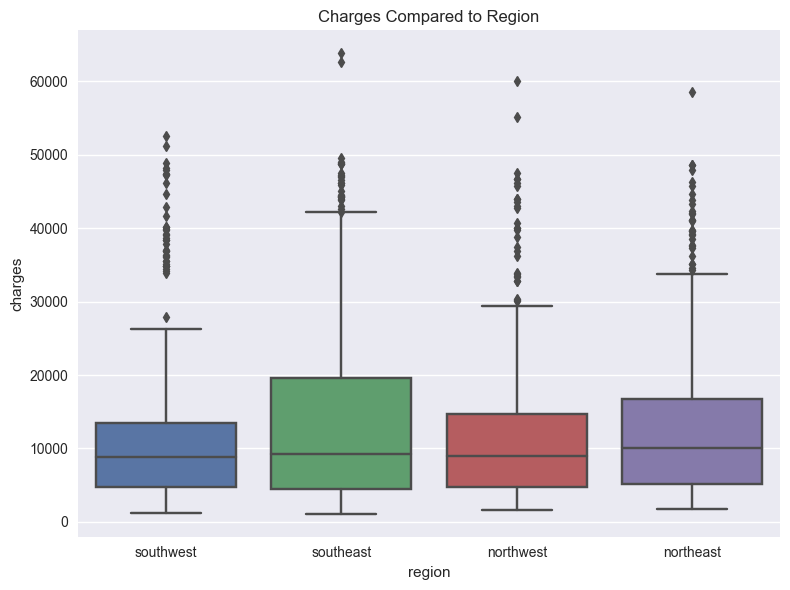

In [92]:
# Visualization
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(x = df['region'], y = df['charges'],ax=ax)
ax.set_title('Charges Compared to Region')

plt.tight_layout()